In [1]:
#Test random sampling
import random_sampling

print random_sampling.parallel_random_sampling(0.1,["data/part1.tsv","data/part2.tsv"], 1)
print random_sampling.parallel_outbox_sampling((30,30,"*","*"),(60,60,"*","*"),0.1,["data/part1.tsv","data/part2.tsv"], 8)
print random_sampling.parallel_inbox_sampling((30,30,"*","*"),(60,60,"*","*"),0.1,["data/part1.tsv","data/part2.tsv"], 8)


Job done. Completed 2 jobs
[['data/part1.tsv-rand-0.1', 93], ['data/part2.tsv-rand-0.1', 82]]
Job done. Completed 2 jobs
[['data/part1.tsv-outbb-0.1', 43], ['data/part2.tsv-outbb-0.1', 35]]
Job done. Completed 2 jobs
[['data/part1.tsv-inbb-0.1', 15], ['data/part2.tsv-inbb-0.1', 14]]


In [2]:
# Test uncertainty Sampling
import load_tsv
import numpy
from sklearn import linear_model
import uncertainty_sampling

features, truth = load_tsv.load_tsv_features_truth("data/part1.tsv",[0,1,2],3)
linreg = linear_model.LinearRegression()
linreg.fit(features, truth)
vals = uncertainty_sampling.parallel_reg_uncertainty_sampling(linreg,["data/part1.tsv", "data/part2.tsv"],[0,1,2],3,0.1,1)
print vals

Job done. Completed 2 jobs
[['data/part1.tsv-regunc-101', array([ 0.53297534,  0.53474245,  0.53487658,  0.53761599,  0.54196936,
        0.54404117,  0.54462545,  0.54764642,  0.54864896,  0.55358286,
        0.55571512,  0.56226359,  0.56599837,  0.56802731,  0.57089309,
        0.57884675,  0.58033805,  0.58137395,  0.58371   ,  0.58374505,
        0.58419042,  0.58550388,  0.58613264,  0.58656579,  0.58887871,
        0.59008277,  0.59051461,  0.59053035,  0.59144216,  0.59432821,
        0.59444134,  0.60154336,  0.60851762,  0.60945803,  0.61110839,
        0.61266197,  0.61417579,  0.61652492,  0.62139735,  0.62444424,
        0.62464975,  0.62747188,  0.62863834,  0.63455077,  0.63576629,
        0.63855899,  0.639333  ,  0.64592862,  0.65195754,  0.65497058,
        0.65548713,  0.65602197,  0.65634041,  0.6597521 ,  0.66021223,
        0.66103663,  0.66176682,  0.66395747,  0.66450843,  0.66694681,
        0.67843913,  0.67964169,  0.68031738,  0.68216264,  0.6856245 ,
      

In [3]:
# Test maximum entropy uncertainty Sampling
import load_tsv
import numpy
from sklearn.svm import SVC
import uncertainty_sampling

features, truth = load_tsv.load_tsv_features_truth("data/part1.tsv",[0,1,2],3)
# Create, fit, predict with the SVM Classifier
svm = SVC(C=1, kernel="linear", probability=True, max_iter=50000)
svm.fit(features, truth)
vals = uncertainty_sampling.parallel_maxent_uncertainty_sampling(svm,["data/part1.tsv", "data/part2.tsv"],[0,1,2],3,0.1,1)
print vals

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:209: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Job done. Completed 2 jobs
[['data/part1.tsv-maxentunc-101', array([[  36.01723291,   61.15135767,   74.10274939],
       [  26.0320211 ,   69.01166635,   59.53868796],
       [  51.79386452,   47.82312489,   88.20807682],
       [  42.85851636,   55.43359141,   76.07195726],
       [  45.38735326,   53.53554921,   49.82775057],
       [  10.38633265,   81.848776  ,   13.24367222],
       [  28.58924125,   66.59079813,   96.14947665],
       [  70.60837796,   32.94189112,   93.47262625],
       [  75.55092367,   28.15899785,   74.87441076],
       [  47.12574398,   51.39611261,   46.87697067],
       [  32.20226088,   63.72253135,   52.25878232],
       [  -0.16741166,   90.55351184,   98.70125549],
       [  35.00888801,   62.17808922,   66.67546294],
       [  52.83254415,   46.30639185,   46.23752813],
       [  84.72293639,   20.32032183,   84.58130062],
       [  35.28830325,   62.17913339,   92.28577295],
       [   9.98682734,   82.77667212,   32.7580079 ],
       [  51.8134651 

In [4]:
#%load parallel_jobs.py
#%load load_tsv.py

In [5]:
# Test density Sampling
import load_tsv
import numpy
from sklearn.svm import SVC
import density_sampling

features, truth = load_tsv.load_tsv_features_truth("data/part1.tsv",[0,1,2],3)
vals = density_sampling.parallel_density_sampling(["data/part1.tsv", "data/part2.tsv"], "data/densitytest.tsv", [0,1,2], 3, 3, 0.2, 5, 8)    
print vals

Job done. Completed 2 jobs
printing mins
Job done. Completed 2 jobs
printing grid samples
printing grid samples
merging output
sampling
completed output
['data/densitytest.tsv', 402]


In [6]:
# Test query by committee Sampling
import load_tsv
import numpy
from sklearn.svm import SVC
import query_by_committee_sampling

features, truth = load_tsv.load_tsv_features_truth("data/part1.tsv",[0,1,2],3)
# Create, fit, predict with the SVM Classifier
svm = SVC(C=1, kernel="linear", probability=True, max_iter=50000)
svm.fit(features, truth)
#vals = query_by_committee_sampling.query_sampling(([svm], features, truth, 0.1, "data/part1.tsv"))
#features, truth = load_tsv.load_tsv_features_truth("data/part1.tsv", [0,1,2], 3)
vals = query_by_committee_sampling.parallel_query_sampling([svm],["data/part1.tsv", "data/part2.tsv"]  ,[0,1,2],3,0.1,1)
print vals

Job done. Completed 2 jobs
[['data/part1.tsv-query-101', 1017], ['data/part2.tsv-query-98', 983]]


In [7]:
%matplotlib inline

import matplotlib.pyplot as pyplot
import load_tsv
import numpy
from sklearn.svm import SVC
import uncertainty_sampling

#assumes non-empty array of features
def convert_array(features, truth, idx):
    if idx == -1:
        return numpy.ones(len(features))
    if idx == len(features[0]):
        return truth
    else: #return relevant column
        return features[:,idx]

#if circle_area_feature_idx or color_feature_idx = -1 then choose a default
#if circle_area_feature_idx or color_feature_idx = width of array then choose the truth array
def scatterplot(features, truth, xaxis_feature_idx, yaxis_feature_idx, circle_area_feature_idx, color_feature_idx, axis=None):
    fig, ax = pyplot.subplots()
    ax.grid(True, alpha=0.3)
    pyplot.scatter(convert_array(features, truth, xaxis_feature_idx), 
                       convert_array(features, truth, yaxis_feature_idx),
                       marker='o', 
                       s=convert_array(features, truth, circle_area_feature_idx), 
                       c=convert_array(features, truth, color_feature_idx))
    if axis != None and len(axis) == 4: #in format [xmin,xmax,ymin,ymax]
        pyplot.axis(axis)
    pyplot.gcf().set_size_inches(15, 10)
    pyplot.show()

def boxplot(features, truth, feature_idxs, feature_labels, by_label=None):
    fig, ax = pyplot.subplots()
    data = []
    if by_label == None:
        for idx in feature_idxs:
            data.append(features[:,idx])
        ax.boxplot(data, labels=feature_labels)
    else:
        box_labels = []
        for idx in feature_idxs:
            for j in by_label:
                data.append([features[i,idx] for i in range(len(truth)) if truth[i]==by_label[j]])
                box_labels.append(feature_labels[idx]+"-"+str(by_label[j]))
        ax.boxplot(data, labels=box_labels)
    #pyplot.setp(feature_labels, rotation=45, fontsize=8)
    pyplot.gcf().set_size_inches(15, 10)
    pyplot.show()

def histogram(features, feature_idx, feature_label, bins, axis):
    fig, ax = pyplot.subplots()
    n, bins, patches = pyplot.hist(features[:,feature_idx], bins)
    pyplot.xlabel(feature_label)
    pyplot.gcf().set_size_inches(15, 10)
    pyplot.show()


Plotting data/part1.tsv


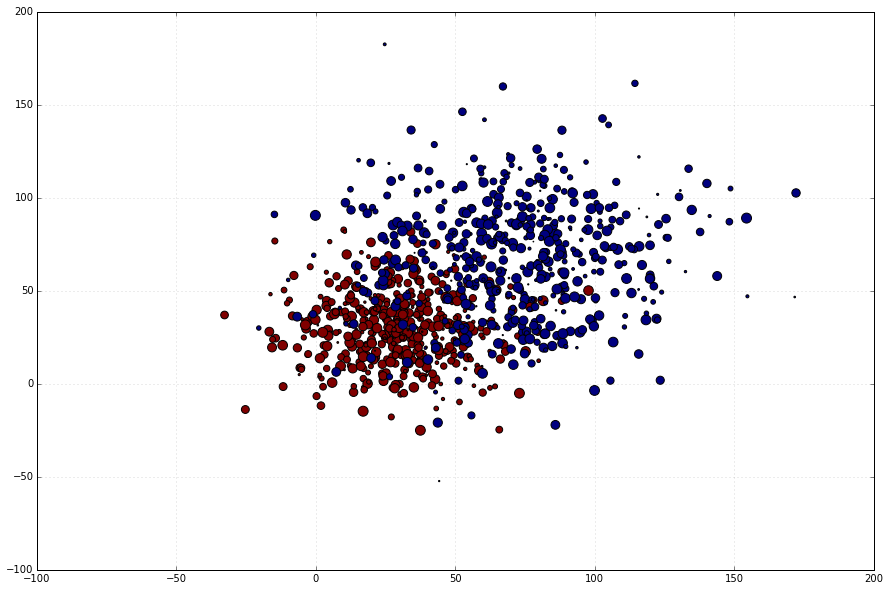

random
Job done. Completed 2 jobs
uncertainty
Job done. Completed 2 jobs
density
Job done. Completed 2 jobs
printing mins
Job done. Completed 2 jobs
printing grid samples
printing grid samples
merging output
sampling
completed output
query
Job done. Completed 2 jobs
[['data/part1.tsv-rand-0.1', 102], ['data/part2.tsv-rand-0.1', 95]] [['data/part1.tsv-smallmarginunc-101', array([[  54.72006523,   41.81110405,   31.88789409],
       [  54.56967244,   42.31807737,   84.88160037],
       [  68.73031819,   30.63294932,   65.72280338],
       [  29.6032287 ,   62.67280075,   56.07608962],
       [  24.41052257,   66.59989746,   70.5424155 ],
       [  79.29967485,   22.33122672,   37.93296764],
       [  55.77950246,   41.37355979,   48.77632533],
       [  53.81489734,   42.87918744,   95.53240892],
       [  76.68745925,   24.15631136,   94.06907018],
       [  27.61658471,   64.79063748,   88.37189056],
       [ 105.58339012,    1.71043859,   53.30280456],
       [  49.1997775 ,   47.4887

In [8]:
import load_tsv
import numpy
from sklearn.svm import SVC
import query_by_committee_sampling
import density_sampling
import random_sampling
import uncertainty_sampling

features, truth = load_tsv.load_tsv_features_truth("data/part1.tsv",[0,1,2],3)
print "Plotting "+"data/part1.tsv"
scatterplot(features, truth, 0,1,2,3, [-100,200,-100,200])

svm = SVC(C=1, kernel="linear", probability=True, max_iter=50000)
svm.fit(features, truth)
print "random"
rand_files = random_sampling.parallel_random_sampling(0.1,["data/part1.tsv","data/part2.tsv"], 1)
print "uncertainty"
unc_files = uncertainty_sampling.parallel_smallmargin_uncertainty_sampling(svm,["data/part1.tsv", "data/part2.tsv"]  ,[0,1,2],3,0.1,1)
print "density"
den_files = density_sampling.parallel_density_sampling(["data/part1.tsv", "data/part2.tsv"], "data/densitytest.tsv", [0,1,2], 3, 3, 0.2, 5, 8)
print "query"
qry_files = query_by_committee_sampling.parallel_query_sampling([svm],["data/part1.tsv", "data/part2.tsv"]  ,[0,1,2],3,0.1,1)

print rand_files, unc_files, den_files, qry_files


if False:
    # Create, fit, predict with the SVM Classifier
    svm = SVC(C=1, kernel="linear", probability=True, max_iter=50000)
    svm.fit(features, truth)
    #features, truth = load_tsv.load_tsv_features_truth("data/part1.tsv", [0,1,2], 3)
    vals = uncertainty_sampling.parallel_smallmargin_uncertainty_sampling(svm,["data/part1.tsv", "data/part2.tsv"]  ,[0,1,2],3,0.1,1)
    for val in vals:
        print "Plotting "+val[0]
        #scatterplot(val[1], truth[val[2]], 0,1,2,3, [-100,200,-100,200])
    
    #features, truth = load_tsv.load_tsv_features_truth("data/part1.tsv", [0,1,2], 3)
    vals = uncertainty_sampling.parallel_maxent_uncertainty_sampling(svm,["data/part1.tsv", "data/part2.tsv"]  ,[0,1,2],3,0.1,1)
    for val in vals:
        print "Plotting "+val[0]
        #scatterplot(val[1], truth[val[2]], 0,1,2,3,[-100,200,-100,200])
        boxplot(val[1],truth[val[2]],[0,1,2],["feature1","feature2","feature3"],[0,1])
        histogram(val[1],0,val[0]+"-feature1",50,None)
